In [1]:
import numpy as np
from cell_model_mothermachine_divNoise import Cell_Population
import pandas as pd
import matplotlib.pyplot as plt

### Simulating in poor nutrients

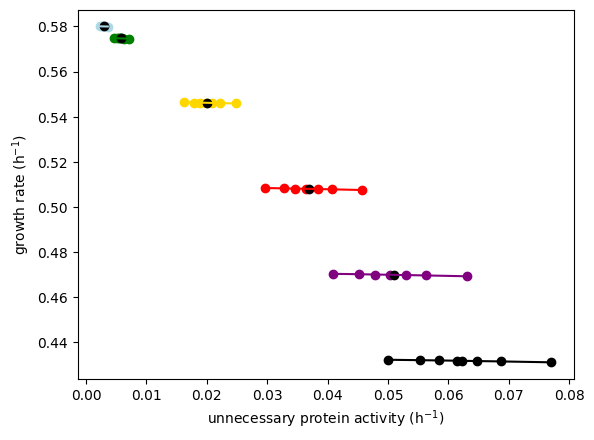

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.00

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 1.5
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_poor_riboDivNoise_0p00.csv')
# df_gr.to_csv('growthRate_poor_riboDivNoise_0p00.csv')

plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_0p00.pdf', dpi=300, bbox_inches='tight')

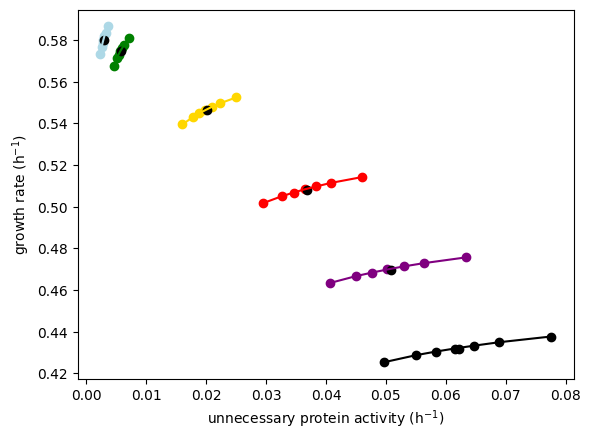

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.02

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 1.5
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_poor_riboDivNoise_0p02.csv')
# df_gr.to_csv('growthRate_poor_riboDivNoise_0p02.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_0p02.pdf', dpi=300, bbox_inches='tight')

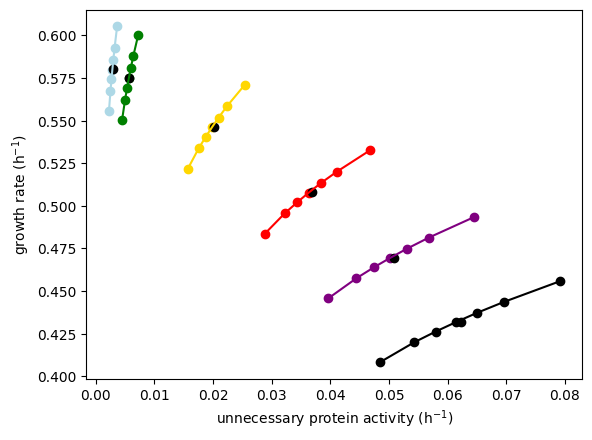

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.04

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 1.5
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_poor_riboDivNoise_0p04.csv')
# df_gr.to_csv('growthRate_poor_riboDivNoise_0p04.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_0p04.pdf', dpi=300, bbox_inches='tight')

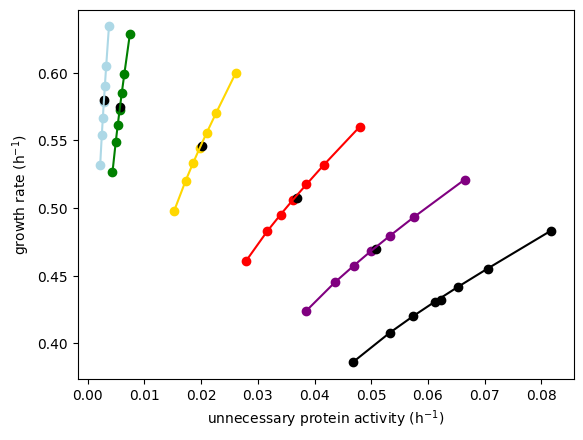

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.06

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 1.5
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act_poor = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr_poor = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act_poor.to_csv('activity_poor_riboDivNoise_0p06.csv')
# df_gr_poor.to_csv('growthRate_poor_riboDivNoise_0p06.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_0p06.pdf', dpi=300, bbox_inches='tight')

### Simulating in rich nutrients

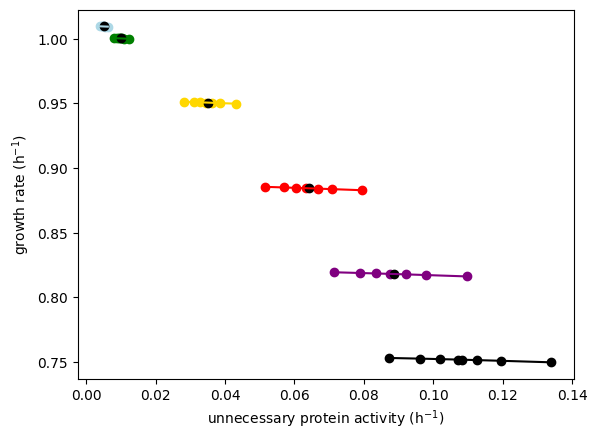

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.00

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 3.43
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_rich_riboDivNoise_0p00.csv')
# df_gr.to_csv('growthRate_rich_riboDivNoise_0p00.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_rich_0p00.pdf', dpi=300, bbox_inches='tight')

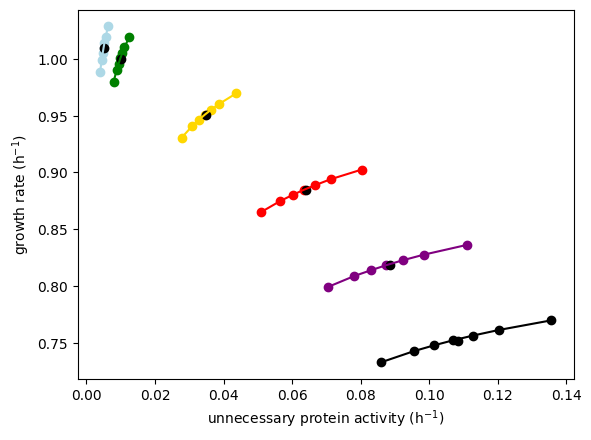

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.02

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 3.43
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_rich_riboDivNoise_0p02.csv')
# df_gr.to_csv('growthRate_rich_riboDivNoise_0p02.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_rich_0p02.pdf', dpi=300, bbox_inches='tight')

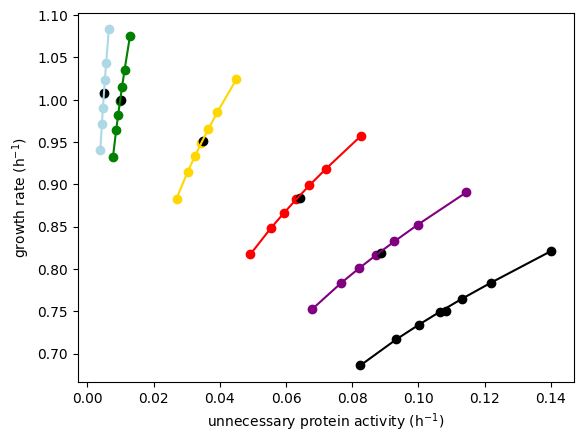

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.04

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 3.43
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_rich_riboDivNoise_0p04.csv')
# df_gr.to_csv('growthRate_rich_riboDivNoise_0p04.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_rich_0p04.pdf', dpi=300, bbox_inches='tight')

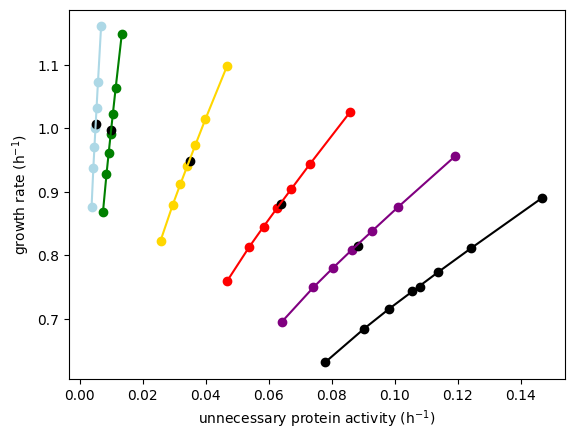

In [ ]:
tau_r = 10000
tau_u = 100
sigma_u = 0.3
ribo_div_noise = 0.06

n_steps = 2000
start_t = 500

figure = plt.figure()
colors=['lightblue','green','gold','red','purple','k','gray']


k_n0 = 3.43
f_i = np.array([0.005, 0.01, 0.0368, 0.0726, 0.1084, 0.1442])

df_act, df_gr, df_phiR, df_vol, df_phiU = [pd.DataFrame([]) for _ in range(5)]

for fi,j in zip(f_i,range(len(f_i))):
    simulator = Cell_Population(k_n0, ribo_div_noise, fi, tau_u, sigma_u, tau_r)
    simulator.initialize()
    cells = [simulator.num_cells_init]
    act, kappa, phiR, vol, phiU = [np.array([]) for _ in range(5)]

    for i in range(n_steps):
        time, num_cells, gr, activity, phi_R, volume, phi_U = simulator.simulate_population(cells[-1])
        cells.append(num_cells)
        kappa = np.concatenate([kappa, gr[start_t:]])
        act = np.concatenate([act, activity[start_t:]])
        phiR = np.concatenate([phiR, phi_R[start_t:]])
        vol = np.concatenate([vol, volume[start_t:]])
        phiU = np.concatenate([phiU, phi_U[start_t:]])


    num_bins_x = 7
    # Bin the data in x and y directions
    x_bins = pd.qcut(act, num_bins_x, labels=False)
    # Compute mean x and y for each bin
    df = pd.DataFrame({'act '+str(fi): act, 'gr '+str(fi): kappa, 'x_bin': x_bins})
    binned_data = df.groupby('x_bin').agg({'act '+str(fi): 'mean', 'gr '+str(fi): 'mean'}).reset_index()

    # Create dfs for saving data
    df_act = pd.concat((df_act, df['act '+str(fi)]), axis=1)
    df_gr = pd.concat((df_gr, df['gr '+str(fi)]), axis=1)
    df_phiR = pd.concat((df_phiR, pd.DataFrame(phiR, columns=['phiR '+str(fi)])), axis=1)
    df_vol = pd.concat((df_vol, pd.DataFrame(phiR, columns=['vol '+str(fi)])), axis=1)
    df_phiU = pd.concat((df_phiU, pd.DataFrame(phiR, columns=['phiU '+str(fi)])), axis=1)

    # plt.scatter(activity, growth_rate, alpha=0.1, color=colors[j])
    plt.plot(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(binned_data['act '+str(fi)],binned_data['gr '+str(fi)], color=colors[j])
    plt.scatter(np.mean(act), np.mean(kappa), color='k')

# df_act.to_csv('activity_rich_riboDivNoise_0p06.csv')
# df_gr.to_csv('growthRate_rich_riboDivNoise_0p06.csv')


plt.xlabel('unnecessary protein activity (h$^{-1}$)')
plt.ylabel('growth rate (h$^{-1}$)')
plt.show()
# figure.savefig('simpsons_paradox_riboDivNoise_rich_0p06.pdf', dpi=300, bbox_inches='tight')

#### Further analysis relating activity to mass fraction

In [ ]:
# import saved simulation results
df_act = pd.read_csv('activity_rich_riboDivNoise_0p06.csv')
df_gr = pd.read_csv('growthRate_rich_riboDivNoise_0p06.csv')
df_act = df_act.drop(columns=df_act.columns[0]) # dropping index
df_gr = df_gr.drop(columns=df_gr.columns[0])

df_act_poor = pd.read_csv('activity_poor_riboDivNoise_0p06.csv')
df_gr_poor = pd.read_csv('growthRate_poor_riboDivNoise_0p06.csv')
df_act_poor = df_act_poor.drop(columns=df_act_poor.columns[0]) # dropping index
df_gr_poor = df_gr_poor.drop(columns=df_gr_poor.columns[0])

In [30]:
gr_rich = [df_gr[df_gr.columns[i]].mean() for i in range(len(df_gr.columns))]
act_rich = [df_act[df_act.columns[i]].mean() for i in range(len(df_act.columns))]

gr_poor = [df_gr_poor[df_gr_poor.columns[i]].mean() for i in range(len(df_gr_poor.columns))]
act_poor = [df_act_poor[df_act_poor.columns[i]].mean() for i in range(len(df_act_poor.columns))]

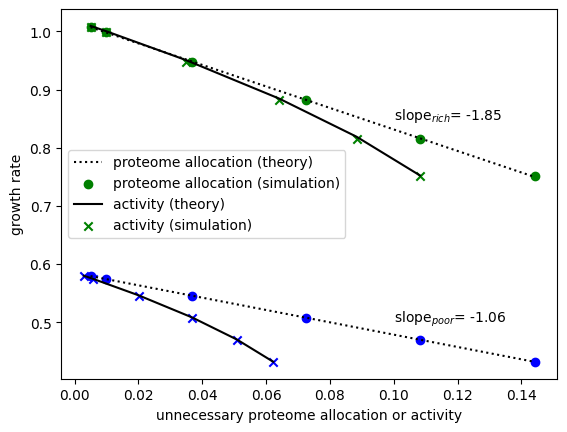

In [31]:
pa_func = lambda A,phi_C,K_0: (K_0 + np.sqrt(K_0**2 - 4*K_0*A/phi_C)) / 2
lin_mod = lambda x,p: p[0]*x + p[1]

# plt.plot(act_rich,gr_rich)
fU_rich = np.array(act_rich)/np.array(gr_rich)
fU_poor = np.array(act_poor)/np.array(gr_poor)
p_rich = np.polyfit(fU_rich,np.array(gr_rich),deg=1)
p_poor = np.polyfit(fU_poor,np.array(gr_poor),deg=1)

plt.plot(fU_rich,lin_mod(fU_rich,p_rich), linestyle=':', color='k', label='proteome allocation (theory)')
plt.plot(fU_poor,lin_mod(fU_poor,p_poor), linestyle=':', color='k')
plt.scatter(fU_rich,gr_rich, color='green', label='proteome allocation (simulation)')
plt.scatter(fU_poor,gr_poor, color='blue')

gr_rich_0 = 1.0188209227847578
gr_poor_0 = 0.5852954576986202
plt.plot(np.array(act_rich),pa_func(np.array(act_rich),0.55,gr_rich_0), color='k', label='activity (theory)')
plt.plot(np.array(act_poor),pa_func(np.array(act_poor),0.55,gr_poor_0), color='k')
plt.scatter(act_rich,gr_rich, color='green', marker='x', label='activity (simulation)')
plt.scatter(act_poor,gr_poor, color='blue', marker='x')

plt.annotate('slope$_{rich}$= '+str(np.round(p_rich[0],2)),xy=(0.1,0.85))
plt.annotate('slope$_{poor}$= '+str(np.round(p_poor[0],2)),xy=(0.1,0.5))
plt.ylabel('growth rate')
plt.xlabel('unnecessary proteome allocation or activity')
plt.legend()
plt.show()